# MODS206 - Data analysis in economics 2 - Applied Econometrics

### Leonardo Hannas de Carvalho Santos
### Yuri de Sene Alvizi 
### João Lucas Furtado Melga

* Why does the column 'hour' is filled with zeros
* What does the Day of the week (dow) column represent?
* What represents the scale of the feature weather?
* The R-squared got a bizarre value of zero when trying to predict the 3 features. What could be the reason for that?


* Do we need to clean the traffic data?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
!pip install arrow

In [3]:
traffic = pd.read_feather('codedDataset/trafficDataset.feather')

# Group by date to decresase the datapoints

In [4]:
traffic

,city,station,weather,dow,datetime,hour,speed,vehicleType,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
0,1,1,3,4,2021-04-01,0,31,2,9.35676,1,False,False
1,1,1,3,4,2021-04-01,0,38,2,8.35296,1,False,False
2,1,1,3,4,2021-04-01,0,29,3,11.29870,1,False,False
3,1,1,3,4,2021-04-01,0,42,1,6.56640,1,False,False
4,1,1,3,4,2021-04-01,0,41,2,7.99116,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43952647,6,10,1,6,2021-07-31,0,40,1,6.75600,3,False,False
43952648,6,10,1,6,2021-07-31,0,48,2,7.30656,3,False,False
43952649,6,10,1,6,2021-07-31,0,43,2,7.77276,3,False,False
43952650,6,10,1,6,2021-07-31,0,44,3,8.94880,3,False,False


In [5]:
df = traffic.groupby('city').mean().drop(columns=['station', 'weather', 'dow', 'vehicleType', 'hour'])
df

,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
city,,,,,
1,33.383528,9.552725,2.948498,0.002468,0.000330
2,39.501495,8.566721,2.975273,0.002963,0.000398
3,39.501675,8.566848,2.471608,0.002382,0.000325
4,39.501333,8.565293,1.180170,0.001197,0.000123
5,39.510016,8.566635,1.000000,0.000999,0.000145
6,39.497612,8.567330,2.917976,0.002884,0.000378


From the dataframe below, we see that the standard deviation of the speed of the city 1 is higher. We will investigate it.

In [21]:
df_std = traffic.groupby('city').std().drop(columns=['station', 'weather', 'dow', 'vehicleType', 'hour'])
df_std

,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
city,,,,,
1,8.901254,2.098720,0.282210,0.049620,0.018166
2,5.007999,1.506273,0.185971,0.054357,0.019949
3,5.008598,1.506875,0.782969,0.048743,0.018024
4,5.009140,1.505781,0.384329,0.034576,0.011108
5,5.007146,1.506842,0.000000,0.031594,0.012061
6,5.008756,1.506719,0.349471,0.053624,0.019439


In [6]:
city_info = pd.read_csv('info/cityInfo.csv')
city_info.columns = ['city', 'size', 'population', 'popDensity']
city_info


,city,size,population,popDensity
0,1,192,379909,1978.692708
1,2,91,453991,4988.912088
2,3,363,271008,746.578512
3,4,454,152110,335.044053
4,5,394,52620,133.553299
5,6,183,303659,1659.338798


In [7]:
df = df.merge(city_info, on='city')
df

,city,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath,size,population,popDensity
0,1,33.383528,9.552725,2.948498,0.002468,0.000330,192,379909,1978.692708
1,2,39.501495,8.566721,2.975273,0.002963,0.000398,91,453991,4988.912088
2,3,39.501675,8.566848,2.471608,0.002382,0.000325,363,271008,746.578512
3,4,39.501333,8.565293,1.180170,0.001197,0.000123,454,152110,335.044053
4,5,39.510016,8.566635,1.000000,0.000999,0.000145,394,52620,133.553299
5,6,39.497612,8.567330,2.917976,0.002884,0.000378,183,303659,1659.338798


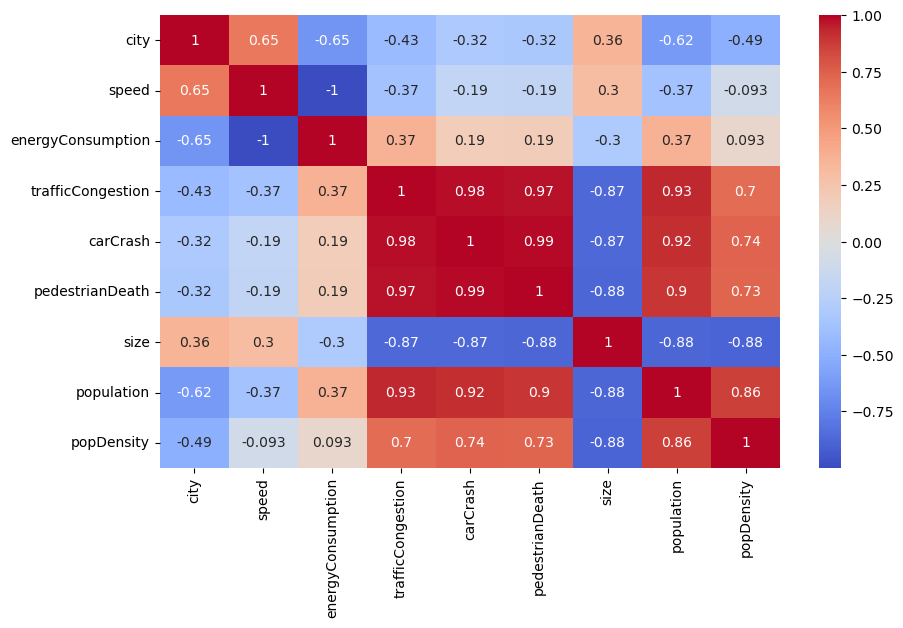

In [8]:
plt.figure(figsize=(10, 6), dpi=100)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [23]:
city_1 = traffic[traffic['city'] == 1].groupby(pd.Grouper(key='datetime', freq='D')).mean().drop(columns=['station', 'weather', 'dow', 'vehicleType', 'hour'])
city_1


,city,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
datetime,,,,,,
2021-04-01,1.0,39.502444,8.563826,2.920885,0.002989,0.000338
2021-04-02,1.0,39.480170,8.570519,2.920581,0.002975,0.000489
2021-04-03,1.0,39.523594,8.556730,3.000000,0.003190,0.000479
2021-04-04,1.0,39.476120,8.568096,3.000000,0.003345,0.000368
2021-04-05,1.0,39.520970,8.565371,2.930426,0.002663,0.000334
...,...,...,...,...,...,...
2021-07-27,1.0,27.183649,10.555001,2.922449,0.002161,0.000259
2021-07-28,1.0,27.180771,10.558136,2.939915,0.002183,0.000258
2021-07-29,1.0,27.214167,10.553890,2.920430,0.001874,0.000272


<Figure size 1000x600 with 0 Axes>

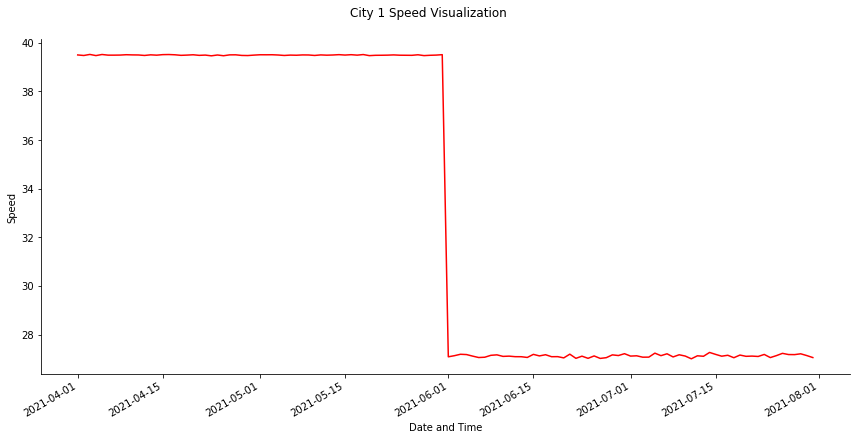

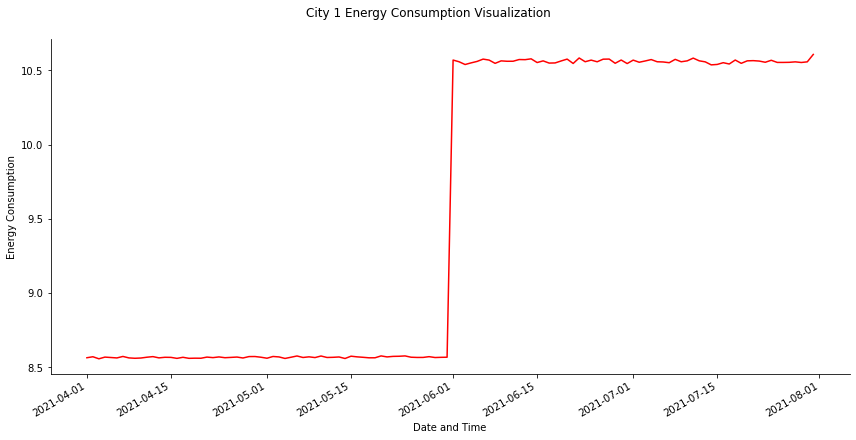

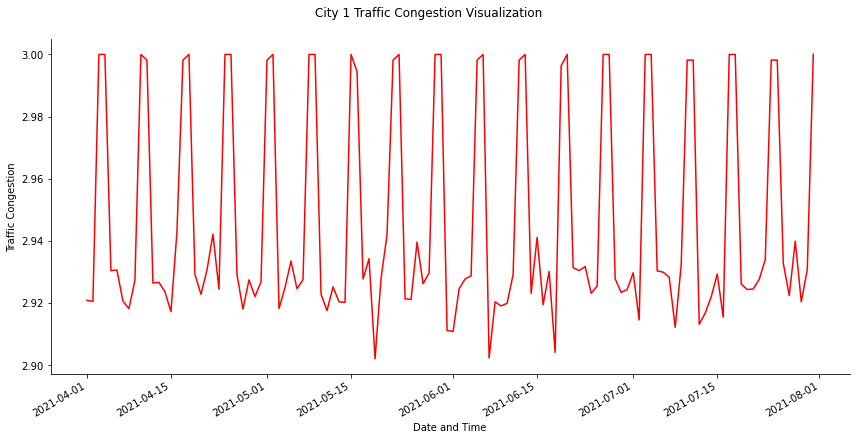

In [39]:
plt.figure(figsize=(10, 6), dpi=100)
g1 = sns.relplot(x='datetime', y='speed', kind='line', data=city_1, height=6, aspect=2, color='red')
g1.fig.autofmt_xdate() 
g1.set_xlabels('Date and Time')
g1.set_ylabels('Speed')
g1.fig.suptitle('City 1 Speed Visualization', y=1.05)

g2 = sns.relplot(x='datetime', y='energyConsumption', kind='line', data=city_1, height=6, aspect=2, color='red')
g2.fig.autofmt_xdate()
g2.set_xlabels('Date and Time')
g2.set_ylabels('Energy Consumption')
g2.fig.suptitle('City 1 Energy Consumption Visualization', y=1.05)

g3 = sns.relplot(x='datetime', y='trafficCongestion', kind='line', data=city_1, height=6, aspect=2, color='red')
g3.fig.autofmt_xdate()
g3.set_xlabels('Date and Time')
g3.set_ylabels('Traffic Congestion')
g3.fig.suptitle('City 1 Traffic Congestion Visualization', y=1.05)

plt.show()


In [43]:
stations_city_1 = traffic[traffic['city'] == 1].groupby([ 'station', pd.Grouper(key='datetime', freq='D')]).mean().drop(columns=['weather', 'dow', 'vehicleType', 'hour'])
stations_city_1

city      speed  energyConsumption  trafficCongestion  \
station datetime                                                            
1       2021-04-01   1.0  39.421352           8.586321           2.884873   
        2021-04-02   1.0  39.434616           8.586430           2.772947   
        2021-04-03   1.0  39.523284           8.562825           3.000000   
        2021-04-04   1.0  39.538990           8.565154           3.000000   
        2021-04-05   1.0  39.525909           8.564945           2.880901   
...                  ...        ...                ...                ...   
10      2021-07-27   1.0  24.478435          10.987449           2.911271   
        2021-07-28   1.0  24.520537          11.008755           2.912668   
        2021-07-29   1.0  24.420923          10.987493           2.919844   
        2021-07-30   1.0  24.469350          10.965828           2.930280   
        2021-07-31   1.0  24.422000          11.069551           3.000000   

                    carCrash  pedestrianDeath  
station datetime                               
1       2021-04-01  0.003347         0.000335  
        2021-04-02  0.002332         0.000833  
        2021-04-03  0.003175         0.000454  
        2021-04-04  0.002136         0.000610  
        2021-04-05  0.003455         0.000329  
...                      ...              ...  
10      2021-07-27  0.002059         0.000206  
        2021-07-28  0.001830         0.000102  
        2021-07-29  0.001336         0.000308  
        2021-07-30  0.002156         0.000308  
        2021-07-31  0.002000         0.000000  

[1220 rows x 6 columns]

From the dataframe below, we see that the stations 4 and 7 have lower speed standard deviations.

In [47]:
stations_city_1_std =  traffic[traffic['city'] == 1].groupby(['station']).std().drop(columns=['weather', 'dow', 'vehicleType', 'hour'])
stations_city_1_std

,city,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
station,,,,,,
1,0.0,9.003540,2.146350,0.408904,0.048072,0.017546
2,0.0,9.001536,2.148230,0.227418,0.048783,0.017631
3,0.0,9.007192,2.146495,0.220044,0.049049,0.017638
4,0.0,5.006400,1.506766,0.224130,0.053505,0.020232
5,0.0,9.008465,2.146914,0.298202,0.048956,0.017982
6,0.0,9.005037,2.146676,0.300439,0.047905,0.017916
7,0.0,5.004583,1.506096,0.414765,0.053696,0.019105
8,0.0,8.997093,2.145184,0.229075,0.048943,0.017961
9,0.0,9.009863,2.149017,0.236556,0.048882,0.017694


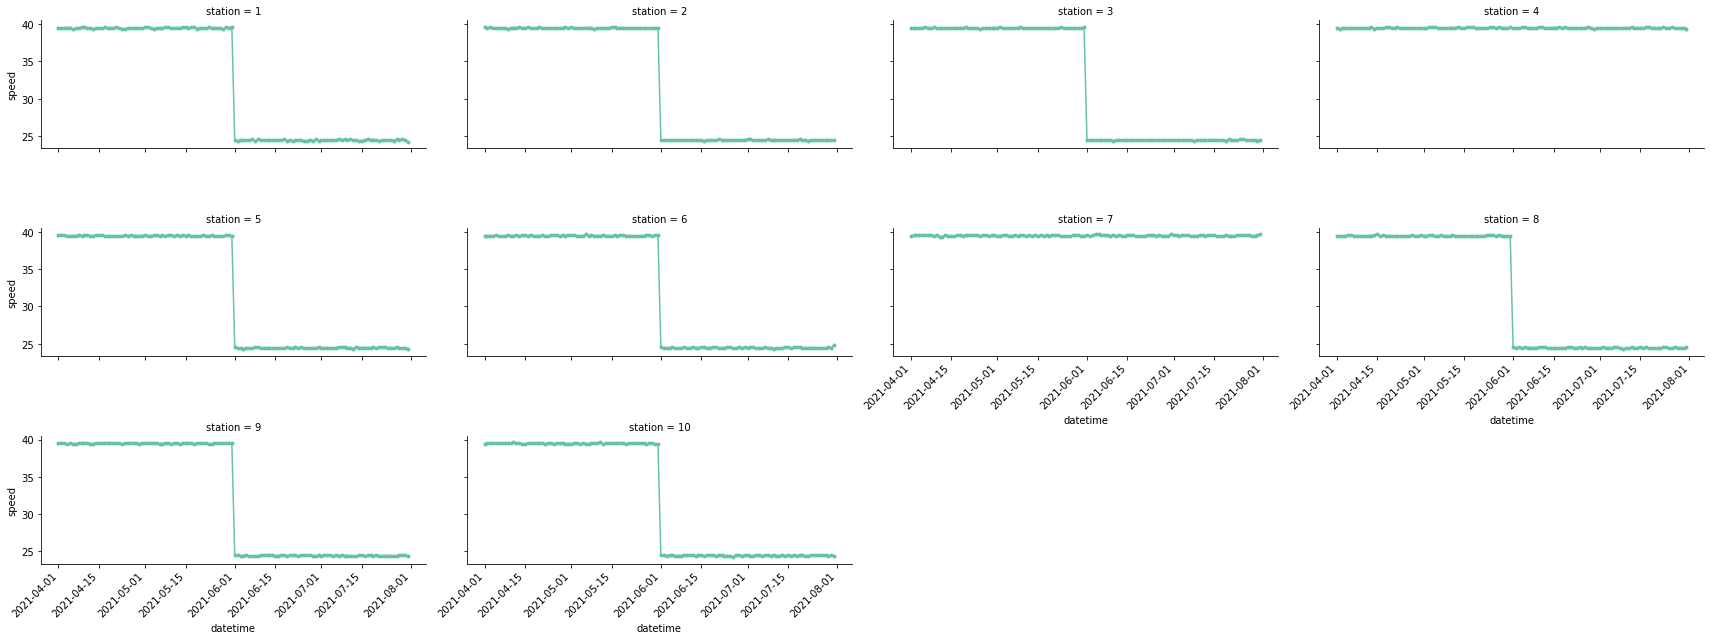

In [50]:
# Plot speed vs datetime for each station
g = sns.FacetGrid(stations_city_1.reset_index(), col="station", col_wrap=4, height=3, aspect=2)
g = g.map(plt.plot, "datetime", "speed", marker=".")

# Rotate x-axis labels for better visibility
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
df = traffic.groupby('station').mean()
df

,city,weather,dow,hour,speed,vehicleType,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
station,,,,,,,,,,
1,2.883881,2.041322,4.106168,12.874432,37.786278,2.250164,8.843181,2.600381,0.002417,0.000316
2,2.584142,2.025215,4.117588,12.754003,36.942616,2.249987,8.979048,2.695781,0.002518,0.000338
3,2.946419,2.018036,4.098529,12.478388,37.428586,2.249051,8.899405,2.856345,0.002674,0.000365
4,3.024295,2.020611,4.128821,12.783734,39.503805,2.250247,8.566751,2.784212,0.002706,0.000366
5,3.040458,2.033017,4.103329,12.547376,37.464283,2.250046,8.894997,2.699057,0.002550,0.000338
6,3.038143,2.014189,4.106714,12.622119,37.700266,2.250629,8.857885,2.805118,0.002629,0.000352
7,3.217140,2.029140,4.097361,12.631813,39.500628,2.250103,8.566797,2.739285,0.002690,0.000358
8,3.005395,2.025731,4.128672,12.800640,37.551491,2.250753,8.881702,2.832695,0.002647,0.000342
9,2.977185,2.012455,4.130261,12.799000,37.495807,2.250047,8.889909,2.869050,0.002710,0.000351


In [10]:
df = traffic.groupby('datetime').mean(numeric_only=True)
df

,city,station,weather,dow,hour,speed,vehicleType,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
datetime,,,,,,,,,,,
2021-04-01 00:00:00,2.540794,5.840500,1.953142,4.0,0.0,39.582323,2.238331,8.540271,2.203234,0.001838,0.000368
2021-04-01 01:00:00,2.623400,6.007877,2.035773,4.0,1.0,39.586479,2.243846,8.549256,2.207581,0.001641,0.000164
2021-04-01 02:00:00,2.774827,5.807385,1.900146,4.0,2.0,39.433612,2.238632,8.556870,2.095126,0.002183,0.000182
2021-04-01 03:00:00,2.587582,5.603595,1.934314,4.0,3.0,39.610131,2.251797,8.554448,2.277288,0.003105,0.000327
2021-04-01 04:00:00,2.494614,5.742007,1.936399,4.0,4.0,39.468627,2.267567,8.595908,2.127714,0.002565,0.000171
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30 20:00:00,2.973565,5.670771,2.014726,5.0,20.0,36.014485,2.251373,9.132583,2.803368,0.002595,0.000302
2021-07-30 21:00:00,3.013463,5.699037,1.810806,5.0,21.0,36.134686,2.259678,9.124613,2.810866,0.002393,0.000419
2021-07-30 22:00:00,3.000708,5.701893,2.007666,5.0,22.0,36.180692,2.251813,9.105311,2.817008,0.002241,0.000236


In [11]:
# # Linear Regression to predict the number of car crashes
# X = traffic.drop(['city', 'station', 'weather', 'dow', 'datetime', 'hour', 'vehicleType', 'carCrash', 'pedestrianDeath'], axis=1)
# y = traffic['carCrash']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

# model = sm.OLS(y_train, X_train)
# results = model.fit()

# print("Intercept:", results.params[0])

# data = {'Feature': X.columns, 'Slope': results.params[1:]}
# df_coefs = pd.DataFrame(data)
# df_coefs.reset_index(drop=True, inplace=True)
# df_coefs

In [12]:
# print(results.summary())

In [13]:
# # Linear Regression to predict the number of pedestrian deaths
# X = traffic.drop(['city', 'station', 'weather', 'dow', 'datetime', 'hour', 'vehicleType', 'carCrash', 'pedestrianDeath'], axis=1)
# y = traffic['pedestrianDeath']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

# model = sm.OLS(y_train, X_train)
# results = model.fit()

# print("Intercept:", results.params[0])

# data = {'Feature': X.columns, 'Slope': results.params[1:]}
# df_coefs = pd.DataFrame(data)
# df_coefs.reset_index(drop=True, inplace=True)
# df_coefs

In [14]:
# print(results.summary())

In [15]:
# # Linear Regression to predict the Traffic Congestion
# X = traffic.drop(['city', 'station', 'dow', 'datetime', 'hour', 'vehicleType', 'trafficCongestion', 'carCrash', 'pedestrianDeath'], axis=1)
# y = traffic['trafficCongestion']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

# model = sm.OLS(y_train, X_train)
# results = model.fit()

# print("Intercept:", results.params[0])

# data = {'Feature': X.columns, 'Slope': results.params[1:]}
# df_coefs = pd.DataFrame(data)
# df_coefs.reset_index(drop=True, inplace=True)
# df_coefs

In [16]:
# print(results.summary())

In [17]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(traffic.isnull(), cmap='coolwarm', cbar=False)
# plt.show()

In [18]:
# Correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(traffic.corr(), annot=False, cmap='viridis')

In [19]:
# Residuals
# sns.histplot((y_test - predictions), bins=50)